<a href="https://colab.research.google.com/github/Zencriel/BreastCancerDetection/blob/main/BreastCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')


In [ ]:
df = pd.read_csv('data.csv')
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)

<function matplotlib.pyplot.show(close=None, block=None)>

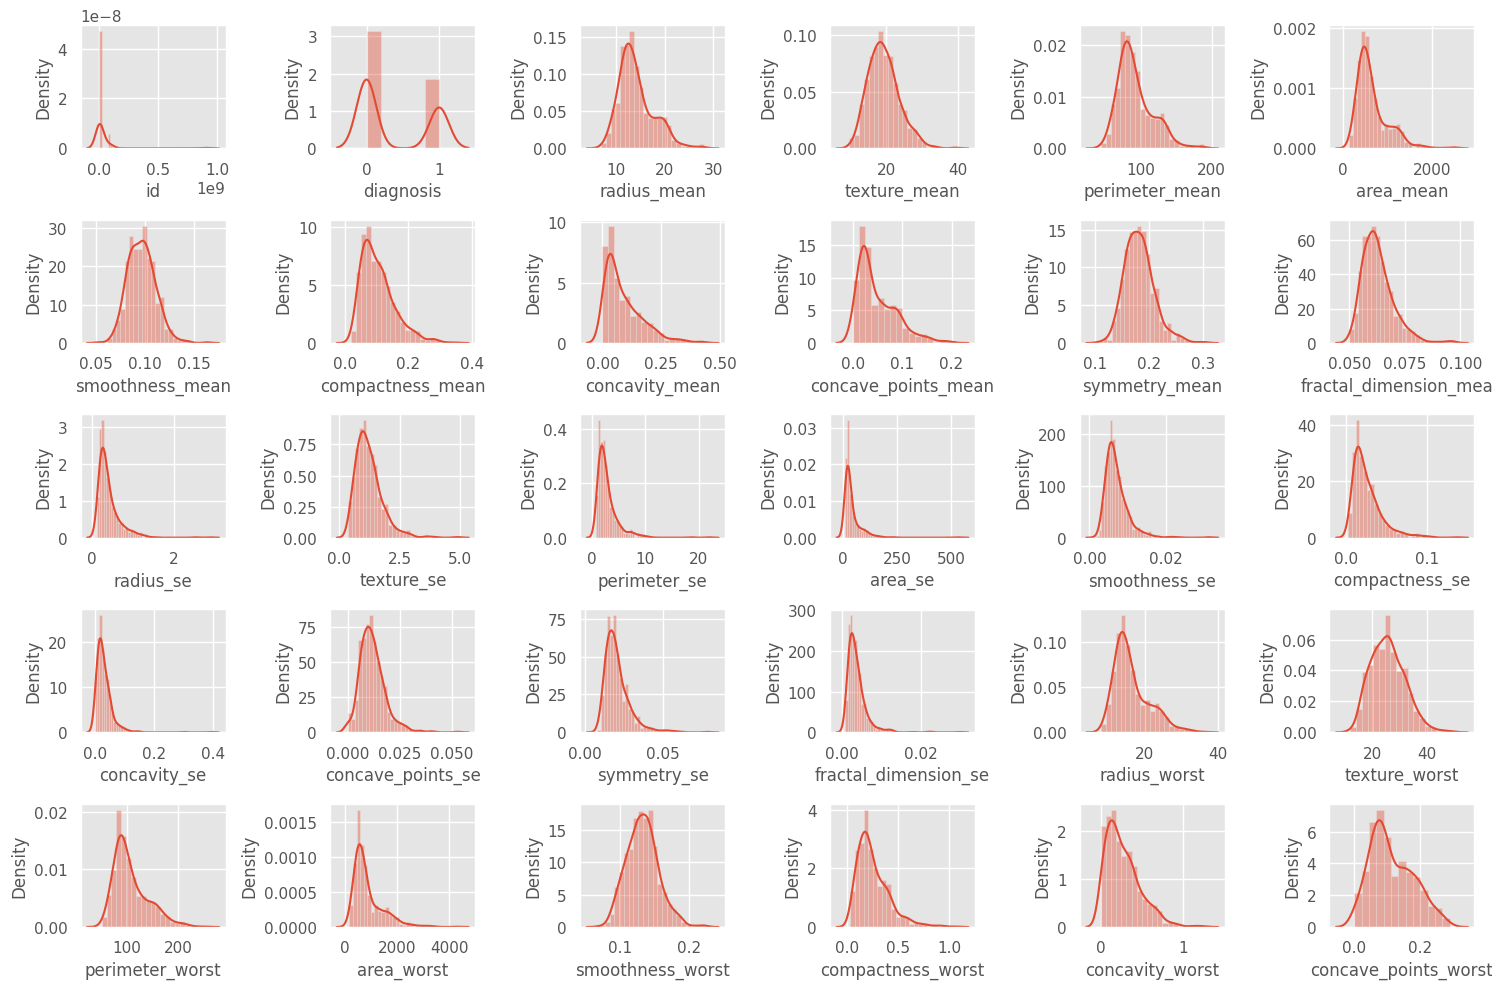

In [ ]:
# DATA ALREADY PREPROCESSED

plt.figure(figsize=(15,10))
plotnumber = 1

for column in df:
  if plotnumber <= 30:
    AX = plt.subplot(5,6,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column)
  plotnumber += 1

plt.tight_layout()
plt.show

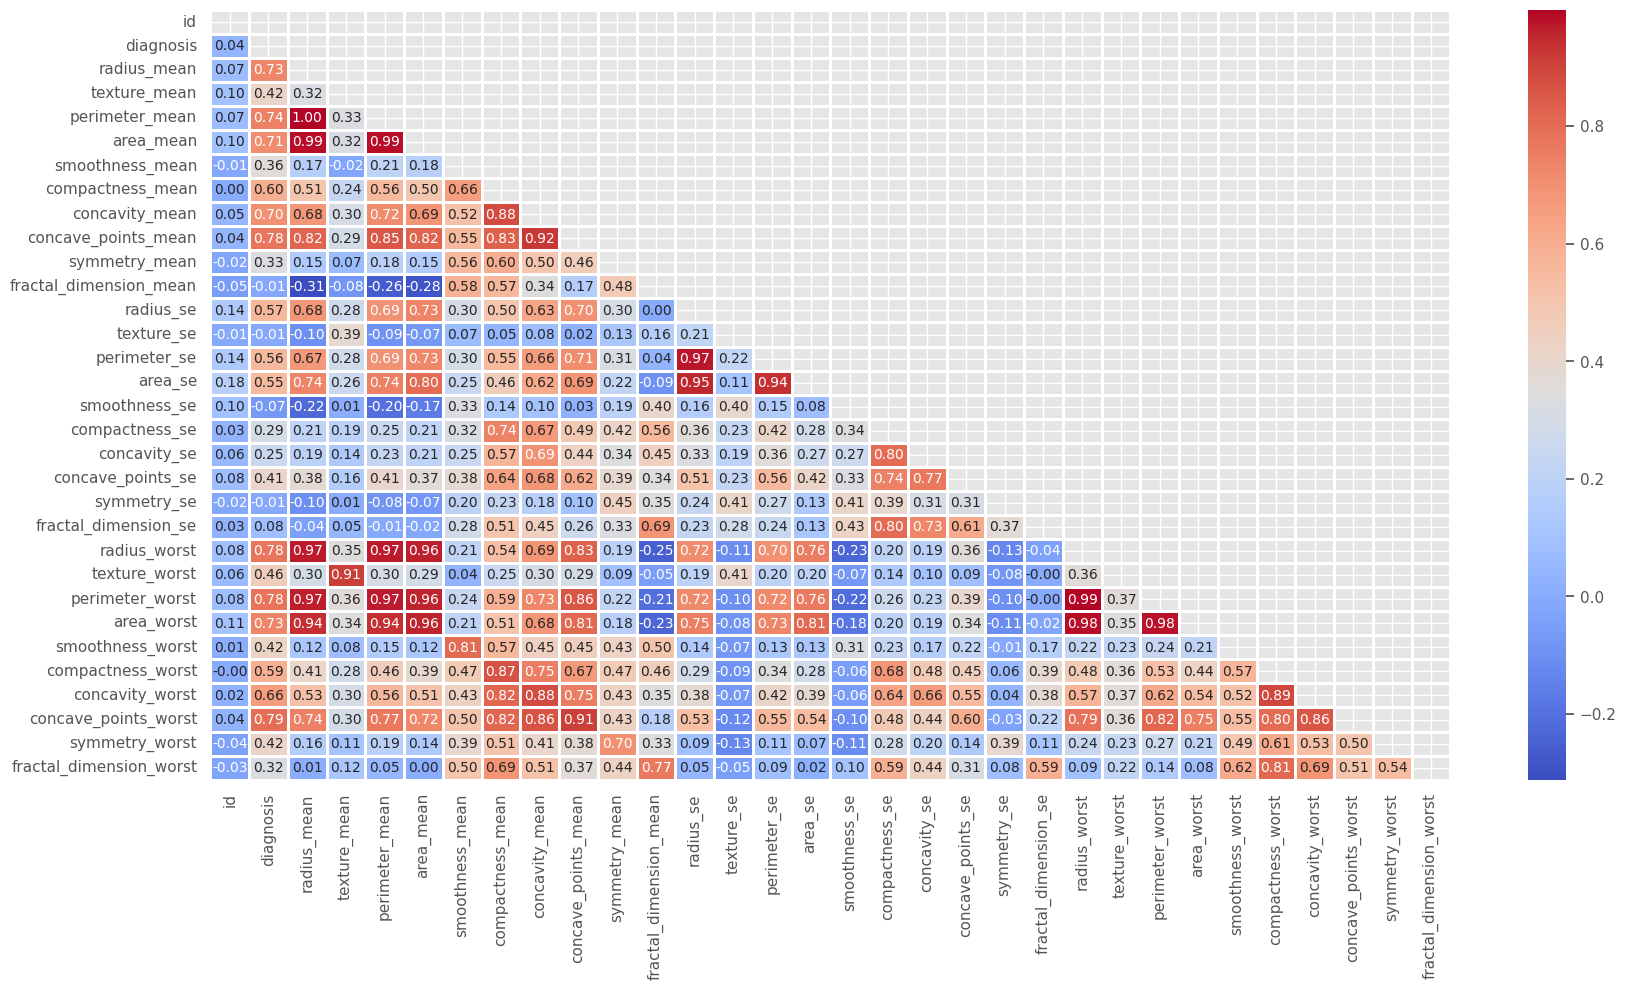

In [ ]:
plt.figure(figsize=(20, 10))
masked = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),mask = masked, annot=True, cmap='coolwarm', linewidths = 1, fmt = '.2f')
plt.show()

In [ ]:
corr_matrix = df.corr().abs()
masked = np.triu(np.ones_like(corr_matrix, dtype=bool))
dummy = corr_matrix.mask(masked)

dropped = [x for x in dummy if any(dummy[x] > 0.92)]
df.drop(dropped, axis=1, inplace=True)

print(df.shape[1])
df.head()

24


,id,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = df['diagnosis']
X = df.drop('diagnosis', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Scale = StandardScaler()
X_train = Scale.fit_transform(X_train)
X_test = Scale.transform(X_test)

In [ ]:
# MODEL - LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

LOGreg = LogisticRegression()
LOGreg.fit(X_train, y_train)

y_prediction = LOGreg.predict(X_test)

LOGacc = accuracy_score(y_test, y_prediction)

print(LOGacc)
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

0.9649122807017544
[[66  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
# MODEL -- K-NEAREST NEIGHBOURS

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

neighbourmodel = KNeighborsClassifier(n_neighbors=5)
neighbourmodel.fit(X_train, y_train)

y_prediction = neighbourmodel.predict(X_test)

KNNacc = accuracy_score(y_test, y_prediction)

print(accuracy_score(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

0.956140350877193
[[66  1]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# MODEL -  SUPPORT VECTOR MACHINE

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning

parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}


svcmodel = SVC(C = 15, gamma = 0.01, probability = True)

Grid = GridSearchCV(svcmodel, parameters, cv=5)
Grid.fit(X_train, y_train)

svcmodel.fit(X_train, y_train)

y_prediction = svcmodel.predict(X_test)

SVMacc = accuracy_score(y_test, y_prediction)

print(accuracy_score(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

0.9824561403508771
[[67  0]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# MODEL - DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


# Hyperparameter Tuning

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 32, 1),
    'min_samples_leaf': range(1, 10, 1),
    'min_samples_split': range(2, 10, 1),
    'splitter': ['best', 'random']
}

DTCacc = accuracy_score(y_test, y_prediction)

treemodel = DecisionTreeClassifier(criterion = 'entropy', max_depth = 15, min_samples_leaf=5, min_samples_split=5, splitter = 'random')
treemodel.fit(X_train, y_train)

print(accuracy_score(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

0.9824561403508771
[[67  0]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbours','Support Vector Machine', 'Decision Tree Classifier'],
    'Score': [100*round(LOGacc,4), 100*round(KNNacc,4),  100*round(SVMacc,4), 100*round(DTCacc,4)]
})

Comparison.sort_values(by='Score', ascending = False)

,Model,Score
2,Support Vector Machine,98.25
3,Decision Tree Classifier,98.25
0,Logistic Regression,96.49
1,K-Nearest Neighbours,95.61


In [ ]:
import pickle
from google.colab import files

model = svcmodel
pickle.dump(model, open('BreastCancerPrediction.pkl', 'wb'))
files.download('BreastCancerPrediction.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

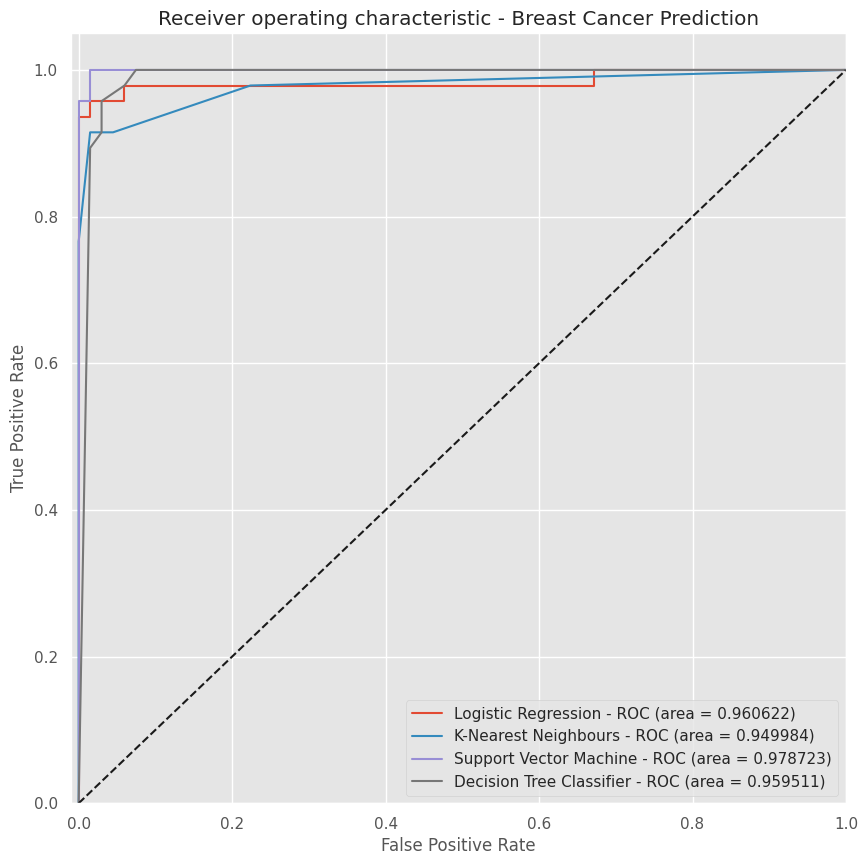

In [ ]:
from sklearn import metrics
plt.figure(figsize=(10, 10))

models = [
  {
    'name': 'Logistic Regression',
    'model': LOGreg,
},
  {
    'name': 'K-Nearest Neighbours',
    'model': neighbourmodel,
},
  {
    'name': 'Support Vector Machine',
    'model': svcmodel,
},
  {
    'name': 'Decision Tree Classifier',
    'model': treemodel,
}
  ]

for m in models:
  model = m['model']
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
  auc = metrics.roc_auc_score(y_test, y_pred)
  plt.plot(fpr, tpr, label='%s - ROC (area = %f)' % (m['name'], auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Breast Cancer Prediction')
plt.legend(loc="lower right")
plt.savefig('ROC.png', format = 'png')
plt.show()
#

[96.49, 98.25, 98.25, 95.61]
[96.06, 95.0, 97.87, 95.63000000000001]


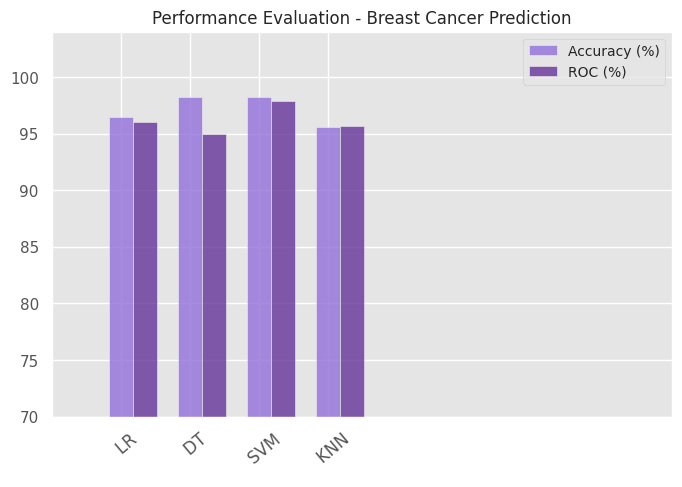

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

models = [
  {
    'name': 'Logistic Regression',
    'model': LOGreg,
},
  {
    'name': 'K-Nearest Neighbours',
    'model': neighbourmodel,
},
  {
    'name': 'Support Vector Machine',
    'model': svcmodel,
},
  {
    'name': 'Decision Tree Classifier',
    'model': treemodel,
}
  ]

means_roc = []
means_accuracy = [100*round(LOGacc,4), 100*round(DTCacc,4), 100*round(SVMacc,4), 100*round(KNNacc,4)]
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

n_groups = 4
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([70, 104])

plt.title('Performance Evaluation - Breast Cancer Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.show()

plt.savefig("PE_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')